# MTA Data Challenges

`Topic:      Challenge Set 1
Subject:    Explore MTA turnstile data
Date:       01/16/17
Name:       Sungwan Kim`

**Benson Challenges**

Note: Challenges can be solved using pandas or python dictionaries.

In [1]:
import csv
from datetime import datetime
from collections import Counter, defaultdict

%matplotlib inline
import matplotlib.pyplot as plt

## Challenge 1

* Open up a new IPython notebook
* Download a few MTA turnstile data files
* Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [2]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0  1759k      0 --:--:--  0:00:14 --:--:-- 1406k


In [3]:
with open('turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [4]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [5]:
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))
list(raw_readings.items())[0]

(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
 [('NQR456',
   'BMT',
   '06/20/2015',
   '00:00:00',
   'REGULAR',
   '0005192500',
   '0001756572'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '04:00:00',
   'REGULAR',
   '0005192550',
   '0001756580'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '08:00:00',
   'REGULAR',
   '0005192568',
   '0001756609'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '12:00:00',
   'REGULAR',
   '0005192670',
   '0001756706'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '16:00:00',
   'REGULAR',
   '0005192886',
   '0001756776'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '20:00:00',
   'REGULAR',
   '0005193250',
   '0001756837'),
  ('NQR456',
   'BMT',
   '06/21/2015',
   '00:00:00',
   'REGULAR',
   '0005193409',
   '0001756875'),
  ('NQR456',
   'BMT',
   '06/21/2015',
   '04:00:00',
   'REGULAR',
   '0005193435',
   '0001756882'),
  ('NQR456',
   'BMT',
   '06/21/2015',
   '08:00:00',
   'REGULAR',
   '0005193461',
   '0001756900'),
  ('NQR456',
   

In [6]:
t = defaultdict(list)
for row in rows:
    t[tuple(row[:4])].append(tuple(row[4:]))
list(t.items())[0]

(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
 [('NQR456',
   'BMT',
   '06/20/2015',
   '00:00:00',
   'REGULAR',
   '0005192500',
   '0001756572'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '04:00:00',
   'REGULAR',
   '0005192550',
   '0001756580'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '08:00:00',
   'REGULAR',
   '0005192568',
   '0001756609'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '12:00:00',
   'REGULAR',
   '0005192670',
   '0001756706'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '16:00:00',
   'REGULAR',
   '0005192886',
   '0001756776'),
  ('NQR456',
   'BMT',
   '06/20/2015',
   '20:00:00',
   'REGULAR',
   '0005193250',
   '0001756837'),
  ('NQR456',
   'BMT',
   '06/21/2015',
   '00:00:00',
   'REGULAR',
   '0005193409',
   '0001756875'),
  ('NQR456',
   'BMT',
   '06/21/2015',
   '04:00:00',
   'REGULAR',
   '0005193435',
   '0001756882'),
  ('NQR456',
   'BMT',
   '06/21/2015',
   '08:00:00',
   'REGULAR',
   '0005193461',
   '0001756900'),
  ('NQR456',
   

`raw_readings` is a solution to **Challenge 1**.

## Challenge 2

* Let's turn this into a time series.

For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://labix.org/python-dateutil) module to convert it into a datetime object. For an example check [this StackOverflow question](https://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [7]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time, '%m/%d/%Y%X'), int(in_cumulative))
                                   for _, _, date, time, _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}
list(datetime_cumulative.items())[0]

(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
 [(datetime.datetime(2015, 6, 20, 0, 0), 5192500),
  (datetime.datetime(2015, 6, 20, 4, 0), 5192550),
  (datetime.datetime(2015, 6, 20, 8, 0), 5192568),
  (datetime.datetime(2015, 6, 20, 12, 0), 5192670),
  (datetime.datetime(2015, 6, 20, 16, 0), 5192886),
  (datetime.datetime(2015, 6, 20, 20, 0), 5193250),
  (datetime.datetime(2015, 6, 21, 0, 0), 5193409),
  (datetime.datetime(2015, 6, 21, 4, 0), 5193435),
  (datetime.datetime(2015, 6, 21, 8, 0), 5193461),
  (datetime.datetime(2015, 6, 21, 12, 0), 5193533),
  (datetime.datetime(2015, 6, 21, 16, 0), 5193752),
  (datetime.datetime(2015, 6, 21, 20, 0), 5193985),
  (datetime.datetime(2015, 6, 22, 0, 0), 5194109),
  (datetime.datetime(2015, 6, 22, 4, 0), 5194120),
  (datetime.datetime(2015, 6, 22, 8, 0), 5194164),
  (datetime.datetime(2015, 6, 22, 12, 0), 5194383),
  (datetime.datetime(2015, 6, 22, 16, 0), 5194686),
  (datetime.datetime(2015, 6, 22, 20, 0), 5195595),
  (datetime.datetime(2015

In [8]:
# sort by date
for rows in datetime_cumulative.values():
    assert rows == sorted(rows)

In [9]:
datetime_count_times = {turnstile: [[rows[i][0], # datetime first
                                     # delta on entries
                                     rows[i+1][1] - rows[i][1],
                                     # delta on datetime
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}
list(datetime_count_times.items())[0]

(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
 [[datetime.datetime(2015, 6, 20, 0, 0), 50, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 4, 0), 18, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 8, 0), 102, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 12, 0), 216, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 16, 0), 364, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 20, 0), 159, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 0, 0), 26, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 4, 0), 26, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 8, 0), 72, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 12, 0), 219, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 16, 0), 233, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 20, 0), 124, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 

In [10]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print(all_counts[-50:])

[2428, 2443, 2444, 2447, 2448, 2455, 2456, 2459, 2473, 2474, 2487, 2492, 2514, 2521, 2536, 2548, 2552, 2554, 2558, 2567, 2569, 2579, 2602, 2612, 2621, 2622, 2630, 2630, 2644, 2656, 2670, 2671, 2692, 2728, 2731, 2757, 2765, 2804, 2844, 2848, 2920, 2926, 2926, 3488, 87577, 130932, 131711, 131792, 531430, 117440499]


In [11]:
print(all_counts[:1200])

[-1208464910, -8664797, -7691983, -1958436, -1283643, -531174, -131370, -131215, -130432, -87562, -73467, -65355, -2545, -1929, -1852, -1782, -1720, -1703, -1687, -1677, -1662, -1659, -1645, -1608, -1572, -1571, -1553, -1543, -1533, -1524, -1492, -1484, -1482, -1455, -1410, -1404, -1403, -1402, -1401, -1397, -1378, -1376, -1362, -1357, -1345, -1339, -1332, -1326, -1323, -1311, -1303, -1302, -1299, -1292, -1290, -1290, -1289, -1268, -1263, -1260, -1257, -1246, -1236, -1233, -1226, -1217, -1205, -1196, -1194, -1184, -1182, -1136, -1133, -1130, -1130, -1126, -1120, -1119, -1116, -1113, -1111, -1105, -1094, -1092, -1089, -1086, -1084, -1079, -1077, -1071, -1065, -1059, -1058, -1044, -1036, -1035, -1028, -1021, -1021, -1012, -1000, -995, -994, -991, -991, -978, -968, -965, -965, -962, -957, -957, -954, -952, -943, -937, -933, -932, -930, -919, -911, -908, -886, -885, -884, -882, -882, -873, -871, -869, -868, -862, -858, -842, -840, -838, -832, -825, -822, -820, -818, -814, -813, -801, -800,

In [12]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print(Counter(all_times).most_common(10))

[(4.0, 172791), (4.2, 10460), (8.0, 189), (4.433333333333334, 161), (0.02222222222222222, 80), (0.02277777777777778, 64), (0.022500000000000003, 55), (0.02777777777777778, 26), (3.963888888888889, 24), (0.03611111111111111, 24)]


In [13]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}
datetime_counts

{('A002',
  'R051',
  '02-00-00',
  'LEXINGTON AVE'): [(datetime.datetime(2015, 6, 20, 0, 0),
   50), (datetime.datetime(2015, 6, 20, 4, 0), 18), (datetime.datetime(2015, 6, 20, 8, 0),
   102), (datetime.datetime(2015, 6, 20, 12, 0),
   216), (datetime.datetime(2015, 6, 20, 16, 0), 364), (datetime.datetime(2015, 6, 20, 20, 0),
   159), (datetime.datetime(2015, 6, 21, 0, 0),
   26), (datetime.datetime(2015, 6, 21, 4, 0), 26), (datetime.datetime(2015, 6, 21, 8, 0),
   72), (datetime.datetime(2015, 6, 21, 12, 0),
   219), (datetime.datetime(2015, 6, 21, 16, 0), 233), (datetime.datetime(2015, 6, 21, 20, 0),
   124), (datetime.datetime(2015, 6, 22, 0, 0),
   11), (datetime.datetime(2015, 6, 22, 4, 0), 44), (datetime.datetime(2015, 6, 22, 8, 0),
   219), (datetime.datetime(2015, 6, 22, 12, 0),
   303), (datetime.datetime(2015, 6, 22, 16, 0), 909), (datetime.datetime(2015, 6, 22, 20, 0),
   252), (datetime.datetime(2015, 6, 23, 0, 0),
   23), (datetime.datetime(2015, 6, 23, 4, 0), 62), (datet

`datetime_counts` is a solution to **Challenge 2**.

In [14]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print(len(all_good_counts) / len(all_counts))

0.9941598540495402


In [15]:
all_good_counts.sort()
print(all_good_counts[-5:])

[2848, 2920, 2926, 2926, 3488]


In [16]:
print(all_good_counts[:5])

[0, 0, 0, 0, 0]


In [17]:
list(datetime_counts.items())[0]

(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
 [(datetime.datetime(2015, 6, 20, 0, 0), 50),
  (datetime.datetime(2015, 6, 20, 4, 0), 18),
  (datetime.datetime(2015, 6, 20, 8, 0), 102),
  (datetime.datetime(2015, 6, 20, 12, 0), 216),
  (datetime.datetime(2015, 6, 20, 16, 0), 364),
  (datetime.datetime(2015, 6, 20, 20, 0), 159),
  (datetime.datetime(2015, 6, 21, 0, 0), 26),
  (datetime.datetime(2015, 6, 21, 4, 0), 26),
  (datetime.datetime(2015, 6, 21, 8, 0), 72),
  (datetime.datetime(2015, 6, 21, 12, 0), 219),
  (datetime.datetime(2015, 6, 21, 16, 0), 233),
  (datetime.datetime(2015, 6, 21, 20, 0), 124),
  (datetime.datetime(2015, 6, 22, 0, 0), 11),
  (datetime.datetime(2015, 6, 22, 4, 0), 44),
  (datetime.datetime(2015, 6, 22, 8, 0), 219),
  (datetime.datetime(2015, 6, 22, 12, 0), 303),
  (datetime.datetime(2015, 6, 22, 16, 0), 909),
  (datetime.datetime(2015, 6, 22, 20, 0), 252),
  (datetime.datetime(2015, 6, 23, 0, 0), 23),
  (datetime.datetime(2015, 6, 23, 4, 0), 62),
  (datetime.

## Challenge 3

* These counts are for every n hours. (What is n?) We want total daily entries.

Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [18]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

list(day_counts.items())[0]

(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
 [(datetime.date(2015, 6, 20), 909),
  (datetime.date(2015, 6, 21), 700),
  (datetime.date(2015, 6, 22), 1738),
  (datetime.date(2015, 6, 23), 1791),
  (datetime.date(2015, 6, 24), 2043),
  (datetime.date(2015, 6, 25), 2190),
  (datetime.date(2015, 6, 26), 1596)])

In [19]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = defaultdict(int)
    for time, count in rows:
        day = time.date()
        by_day[day] +=count
    day_counts[turnstile] = sorted(by_day.items())
    
list(day_counts['N135', 'R385', '01-03-00', 'ROCKAWAY BLVD'])

[(datetime.date(2015, 6, 20), 271),
 (datetime.date(2015, 6, 21), 201),
 (datetime.date(2015, 6, 22), 561),
 (datetime.date(2015, 6, 23), 543),
 (datetime.date(2015, 6, 24), 555),
 (datetime.date(2015, 6, 25), 556),
 (datetime.date(2015, 6, 26), 543)]

`day_counts` is a solution to **Challenge 3**.

## Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

`%matplotlib inline`

This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with

`import matplotlib.pyplot as plt`

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

`
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
`

In [20]:
dates = []
for i in list(day_counts.items())[0][1]:
    dates.append(i[0])
dates

[datetime.date(2015, 6, 20),
 datetime.date(2015, 6, 21),
 datetime.date(2015, 6, 22),
 datetime.date(2015, 6, 23),
 datetime.date(2015, 6, 24),
 datetime.date(2015, 6, 25),
 datetime.date(2015, 6, 26)]

In [21]:
counts = []
for i in list(day_counts.items())[0][1]:
    counts.append(i[1])
counts

[909, 700, 1738, 1791, 2043, 2190, 1596]

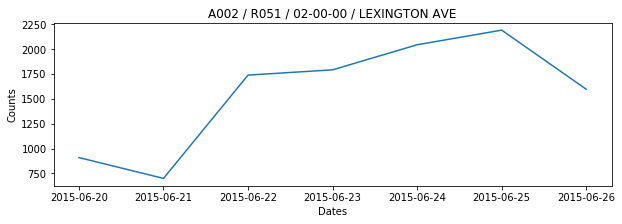

In [22]:
plt.figure(figsize=(10, 3))
plt.plot(dates, counts)
plt.title("A002 / R051 / 02-00-00 / LEXINGTON AVE")
plt.xlabel("Dates")
plt.ylabel("Counts");

## Challenge 5

* So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.



In [23]:
with open('turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [24]:
# combine turnstiles in the same ControlArea/Unit/Station combo
raw_readings_combo = {}
for row in rows:
    raw_readings_combo.setdefault(tuple((row[0],row[1],row[3])), []) \
    .append(tuple(x for i,x in enumerate(row[2:]) if i!=3))
list(raw_readings_combo.items())[0]

(('A002', 'R051', 'LEXINGTON AVE'),
 [('02-00-00',
   'LEXINGTON AVE',
   'NQR456',
   '06/20/2015',
   '00:00:00',
   'REGULAR',
   '0005192500',
   '0001756572'),
  ('02-00-00',
   'LEXINGTON AVE',
   'NQR456',
   '06/20/2015',
   '04:00:00',
   'REGULAR',
   '0005192550',
   '0001756580'),
  ('02-00-00',
   'LEXINGTON AVE',
   'NQR456',
   '06/20/2015',
   '08:00:00',
   'REGULAR',
   '0005192568',
   '0001756609'),
  ('02-00-00',
   'LEXINGTON AVE',
   'NQR456',
   '06/20/2015',
   '12:00:00',
   'REGULAR',
   '0005192670',
   '0001756706'),
  ('02-00-00',
   'LEXINGTON AVE',
   'NQR456',
   '06/20/2015',
   '16:00:00',
   'REGULAR',
   '0005192886',
   '0001756776'),
  ('02-00-00',
   'LEXINGTON AVE',
   'NQR456',
   '06/20/2015',
   '20:00:00',
   'REGULAR',
   '0005193250',
   '0001756837'),
  ('02-00-00',
   'LEXINGTON AVE',
   'NQR456',
   '06/21/2015',
   '00:00:00',
   'REGULAR',
   '0005193409',
   '0001756875'),
  ('02-00-00',
   'LEXINGTON AVE',
   'NQR456',
   '06/21/201

In [25]:
datetime_cumulative_combo = {turnstile: [(scp, datetime.strptime(date + time,'%m/%d/%Y%X'),
                                          int(in_cumulative))
                                         for scp, _, _, date, time,
                                         _, in_cumulative, _ in rows]
                             for turnstile, rows in raw_readings_combo.items()}
list(datetime_cumulative_combo.items())[0]

(('A002', 'R051', 'LEXINGTON AVE'),
 [('02-00-00', datetime.datetime(2015, 6, 20, 0, 0), 5192500),
  ('02-00-00', datetime.datetime(2015, 6, 20, 4, 0), 5192550),
  ('02-00-00', datetime.datetime(2015, 6, 20, 8, 0), 5192568),
  ('02-00-00', datetime.datetime(2015, 6, 20, 12, 0), 5192670),
  ('02-00-00', datetime.datetime(2015, 6, 20, 16, 0), 5192886),
  ('02-00-00', datetime.datetime(2015, 6, 20, 20, 0), 5193250),
  ('02-00-00', datetime.datetime(2015, 6, 21, 0, 0), 5193409),
  ('02-00-00', datetime.datetime(2015, 6, 21, 4, 0), 5193435),
  ('02-00-00', datetime.datetime(2015, 6, 21, 8, 0), 5193461),
  ('02-00-00', datetime.datetime(2015, 6, 21, 12, 0), 5193533),
  ('02-00-00', datetime.datetime(2015, 6, 21, 16, 0), 5193752),
  ('02-00-00', datetime.datetime(2015, 6, 21, 20, 0), 5193985),
  ('02-00-00', datetime.datetime(2015, 6, 22, 0, 0), 5194109),
  ('02-00-00', datetime.datetime(2015, 6, 22, 4, 0), 5194120),
  ('02-00-00', datetime.datetime(2015, 6, 22, 8, 0), 5194164),
  ('02-00-00'

In [26]:
datetime_count_times_combo = {turnstile: [[rows[i][0], rows[i][1], # scp, datetime
                                           # delta on entries
                                           rows[i+1][2] - rows[i][2],
                                           # delta on datetime
                                           rows[i+1][1] - rows[i][1]]
                                          for i in range(len(rows) - 1)]
                              for turnstile, rows in datetime_cumulative_combo.items()}
list(datetime_count_times_combo.items())[0]

(('A002', 'R051', 'LEXINGTON AVE'),
 [['02-00-00',
   datetime.datetime(2015, 6, 20, 0, 0),
   50,
   datetime.timedelta(0, 14400)],
  ['02-00-00',
   datetime.datetime(2015, 6, 20, 4, 0),
   18,
   datetime.timedelta(0, 14400)],
  ['02-00-00',
   datetime.datetime(2015, 6, 20, 8, 0),
   102,
   datetime.timedelta(0, 14400)],
  ['02-00-00',
   datetime.datetime(2015, 6, 20, 12, 0),
   216,
   datetime.timedelta(0, 14400)],
  ['02-00-00',
   datetime.datetime(2015, 6, 20, 16, 0),
   364,
   datetime.timedelta(0, 14400)],
  ['02-00-00',
   datetime.datetime(2015, 6, 20, 20, 0),
   159,
   datetime.timedelta(0, 14400)],
  ['02-00-00',
   datetime.datetime(2015, 6, 21, 0, 0),
   26,
   datetime.timedelta(0, 14400)],
  ['02-00-00',
   datetime.datetime(2015, 6, 21, 4, 0),
   26,
   datetime.timedelta(0, 14400)],
  ['02-00-00',
   datetime.datetime(2015, 6, 21, 8, 0),
   72,
   datetime.timedelta(0, 14400)],
  ['02-00-00',
   datetime.datetime(2015, 6, 21, 12, 0),
   219,
   datetime.timedel

In [27]:
datetime_counts_combo = {turnstile: [(time, count)
                                     for (_, time, count, _) in rows
                                     if 0 <= count <= 5000]
                         for turnstile, rows in datetime_count_times_combo.items()}
list(datetime_counts_combo.items())[0]

(('A002', 'R051', 'LEXINGTON AVE'),
 [(datetime.datetime(2015, 6, 20, 0, 0), 50),
  (datetime.datetime(2015, 6, 20, 4, 0), 18),
  (datetime.datetime(2015, 6, 20, 8, 0), 102),
  (datetime.datetime(2015, 6, 20, 12, 0), 216),
  (datetime.datetime(2015, 6, 20, 16, 0), 364),
  (datetime.datetime(2015, 6, 20, 20, 0), 159),
  (datetime.datetime(2015, 6, 21, 0, 0), 26),
  (datetime.datetime(2015, 6, 21, 4, 0), 26),
  (datetime.datetime(2015, 6, 21, 8, 0), 72),
  (datetime.datetime(2015, 6, 21, 12, 0), 219),
  (datetime.datetime(2015, 6, 21, 16, 0), 233),
  (datetime.datetime(2015, 6, 21, 20, 0), 124),
  (datetime.datetime(2015, 6, 22, 0, 0), 11),
  (datetime.datetime(2015, 6, 22, 4, 0), 44),
  (datetime.datetime(2015, 6, 22, 8, 0), 219),
  (datetime.datetime(2015, 6, 22, 12, 0), 303),
  (datetime.datetime(2015, 6, 22, 16, 0), 909),
  (datetime.datetime(2015, 6, 22, 20, 0), 252),
  (datetime.datetime(2015, 6, 23, 0, 0), 23),
  (datetime.datetime(2015, 6, 23, 4, 0), 62),
  (datetime.datetime(201

In [28]:
day_counts_combo = {}
for turnstile, rows in datetime_counts_combo.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts_combo[turnstile] = sorted(by_day.items())

list(day_counts_combo.items())[0]

(('A002', 'R051', 'LEXINGTON AVE'),
 [(datetime.date(2015, 6, 20), 10606),
  (datetime.date(2015, 6, 21), 7952),
  (datetime.date(2015, 6, 22), 17199),
  (datetime.date(2015, 6, 23), 18000),
  (datetime.date(2015, 6, 24), 18585),
  (datetime.date(2015, 6, 25), 18664),
  (datetime.date(2015, 6, 26), 15392)])

`day_counts_combo` is a solution to **Challenge 5**.

## Challenge 6

Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

In [29]:
with open('turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [30]:
# combine everything in each station
raw_readings_station = {}
for row in rows:
    raw_readings_station.setdefault(row[3], []) \
    .append(tuple(x for i,x in enumerate(row) if i!=3))
list(raw_readings_station.items())[0]

('LEXINGTON AVE',
 [('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '00:00:00',
   'REGULAR',
   '0005192500',
   '0001756572'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '04:00:00',
   'REGULAR',
   '0005192550',
   '0001756580'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '08:00:00',
   'REGULAR',
   '0005192568',
   '0001756609'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '12:00:00',
   'REGULAR',
   '0005192670',
   '0001756706'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '16:00:00',
   'REGULAR',
   '0005192886',
   '0001756776'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '20:00:00',
   'REGULAR',
   '0005193250',
   '0001756837'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/21/2015',
   '00:00:00',
   'REGULAR',
   '0005193409',
   '000175687

In [31]:
datetime_cumulative_station = {turnstile: [(datetime.strptime(date + time,
                                    '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, _, _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings_station.items()}
list(datetime_cumulative_station.items())[0]

('LEXINGTON AVE',
 [(datetime.datetime(2015, 6, 20, 0, 0), 5192500),
  (datetime.datetime(2015, 6, 20, 4, 0), 5192550),
  (datetime.datetime(2015, 6, 20, 8, 0), 5192568),
  (datetime.datetime(2015, 6, 20, 12, 0), 5192670),
  (datetime.datetime(2015, 6, 20, 16, 0), 5192886),
  (datetime.datetime(2015, 6, 20, 20, 0), 5193250),
  (datetime.datetime(2015, 6, 21, 0, 0), 5193409),
  (datetime.datetime(2015, 6, 21, 4, 0), 5193435),
  (datetime.datetime(2015, 6, 21, 8, 0), 5193461),
  (datetime.datetime(2015, 6, 21, 12, 0), 5193533),
  (datetime.datetime(2015, 6, 21, 16, 0), 5193752),
  (datetime.datetime(2015, 6, 21, 20, 0), 5193985),
  (datetime.datetime(2015, 6, 22, 0, 0), 5194109),
  (datetime.datetime(2015, 6, 22, 4, 0), 5194120),
  (datetime.datetime(2015, 6, 22, 8, 0), 5194164),
  (datetime.datetime(2015, 6, 22, 12, 0), 5194383),
  (datetime.datetime(2015, 6, 22, 16, 0), 5194686),
  (datetime.datetime(2015, 6, 22, 20, 0), 5195595),
  (datetime.datetime(2015, 6, 23, 0, 0), 5195847),
  (d

In [32]:
datetime_count_times_station = {turnstile: [[rows[i][0], # datetime
                                             # delta on entries
                                             rows[i+1][1] - rows[i][1],
                                             # delta on datetime
                                             rows[i+1][0] - rows[i][0]]
                                            for i in range(len(rows) - 1)]
                                for turnstile, rows in datetime_cumulative_station.items()}
list(datetime_count_times_station.items())[0]

('LEXINGTON AVE',
 [[datetime.datetime(2015, 6, 20, 0, 0), 50, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 4, 0), 18, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 8, 0), 102, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 12, 0), 216, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 16, 0), 364, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 20, 0), 159, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 0, 0), 26, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 4, 0), 26, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 8, 0), 72, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 12, 0), 219, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 16, 0), 233, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 20, 0), 124, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 22, 0, 0), 11, datetime.tim

In [33]:
datetime_counts_station = {turnstile: [(time, count)
                                       for (time, count, _) in rows
                                       if 0 <= count <= 5000]
                           for turnstile, rows in datetime_count_times_station.items()}
list(datetime_counts_station.items())[0]

('LEXINGTON AVE',
 [(datetime.datetime(2015, 6, 20, 0, 0), 50),
  (datetime.datetime(2015, 6, 20, 4, 0), 18),
  (datetime.datetime(2015, 6, 20, 8, 0), 102),
  (datetime.datetime(2015, 6, 20, 12, 0), 216),
  (datetime.datetime(2015, 6, 20, 16, 0), 364),
  (datetime.datetime(2015, 6, 20, 20, 0), 159),
  (datetime.datetime(2015, 6, 21, 0, 0), 26),
  (datetime.datetime(2015, 6, 21, 4, 0), 26),
  (datetime.datetime(2015, 6, 21, 8, 0), 72),
  (datetime.datetime(2015, 6, 21, 12, 0), 219),
  (datetime.datetime(2015, 6, 21, 16, 0), 233),
  (datetime.datetime(2015, 6, 21, 20, 0), 124),
  (datetime.datetime(2015, 6, 22, 0, 0), 11),
  (datetime.datetime(2015, 6, 22, 4, 0), 44),
  (datetime.datetime(2015, 6, 22, 8, 0), 219),
  (datetime.datetime(2015, 6, 22, 12, 0), 303),
  (datetime.datetime(2015, 6, 22, 16, 0), 909),
  (datetime.datetime(2015, 6, 22, 20, 0), 252),
  (datetime.datetime(2015, 6, 23, 0, 0), 23),
  (datetime.datetime(2015, 6, 23, 4, 0), 62),
  (datetime.datetime(2015, 6, 23, 7, 58, 1

In [34]:
day_counts_station = {}
for turnstile, rows in datetime_counts_station.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts_station[turnstile] = sorted(by_day.items())

list(day_counts_station.items())[0]

('LEXINGTON AVE',
 [(datetime.date(2015, 6, 20), 14161),
  (datetime.date(2015, 6, 21), 10177),
  (datetime.date(2015, 6, 22), 29344),
  (datetime.date(2015, 6, 23), 31095),
  (datetime.date(2015, 6, 24), 31155),
  (datetime.date(2015, 6, 25), 31970),
  (datetime.date(2015, 6, 26), 25534)])

`day_counts_station` is a solution to **Challenge 6**.

## Challenge 7
Plot the time series for a station.

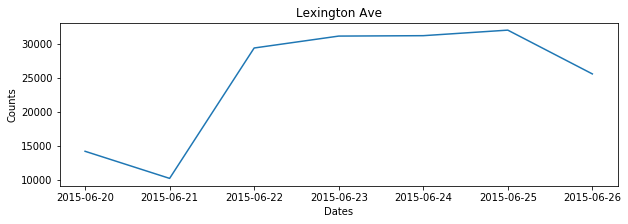

In [35]:
dates = []
for i in list(day_counts_station.items())[0][1]:
    dates.append(i[0])
    
counts = []
for i in list(day_counts_station.items())[0][1]:
    counts.append(i[1])
counts

# for Challenge 8
week_count_list1 = counts
order = [2, 3, 4, 5, 6, 0, 1]
week_count_list1 = [week_count_list1[i] for i in order]

plt.figure(figsize=(10, 3))
plt.plot(dates, counts)
plt.title("Lexington Ave")
plt.xlabel("Dates")
plt.ylabel("Counts");

## Challenge 8

* Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. `plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [36]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150620.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150613.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150606.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0  1539k      0 --:--:--  0:00:16 --:--:-- 2058k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0  2247k      0 --:--:--  0:00:11 --:--:-- 2036k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.8M    0 23.8M    0     0  2443k      0 --:--:--  0:00:10 --:--:-- 1976k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.9M    0 23.9M    0     0  2452k      0 --:--:--  0:00:10 --:--:-- 1995k1M    0     0  2851k      0 --:--:--  0:00:04 --:--:-

In [37]:
with open('turnstile_150620.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']
raw_readings_station = {}
for row in rows:
    raw_readings_station.setdefault(row[3], []) \
    .append(tuple(x for i,x in enumerate(row) if i!=3))
# list(raw_readings_station.items())[0]
datetime_cumulative_station = {turnstile: [(datetime.strptime(date + time,
                                    '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, _, _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings_station.items()}
# list(datetime_cumulative_station.items())[0]
datetime_count_times_station = {turnstile: [[rows[i][0], # datetime
                                             # delta on entries
                                             rows[i+1][1] - rows[i][1],
                                             # delta on datetime
                                             rows[i+1][0] - rows[i][0]]
                                            for i in range(len(rows) - 1)]
                                for turnstile, rows in datetime_cumulative_station.items()}
# list(datetime_count_times_station.items())[0]
datetime_counts_station2 = {turnstile: [(time, count)
                                       for (time, count, _) in rows
                                       if 0 <= count <= 5000]
                           for turnstile, rows in datetime_count_times_station.items()}
# list(datetime_counts_station.items())[0]
day_counts_station2 = {}
for turnstile, rows in datetime_counts_station2.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts_station2[turnstile] = sorted(by_day.items())
# list(day_counts_station2.items())[0]

week_count_list2 = []
for i in list(day_counts_station2.items())[0][1]:
    week_count_list2.append(i[1])
order = [2, 3, 4, 5, 6, 0, 1]
week_count_list2 = [week_count_list2[i] for i in order]

In [38]:
with open('turnstile_150613.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']
raw_readings_station = {}
for row in rows:
    raw_readings_station.setdefault(row[3], []) \
    .append(tuple(x for i,x in enumerate(row) if i!=3))
# list(raw_readings_station.items())[0]
datetime_cumulative_station = {turnstile: [(datetime.strptime(date + time,
                                    '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, _, _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings_station.items()}
# list(datetime_cumulative_station.items())[0]
datetime_count_times_station = {turnstile: [[rows[i][0], # datetime
                                             # delta on entries
                                             rows[i+1][1] - rows[i][1],
                                             # delta on datetime
                                             rows[i+1][0] - rows[i][0]]
                                            for i in range(len(rows) - 1)]
                                for turnstile, rows in datetime_cumulative_station.items()}
# list(datetime_count_times_station.items())[0]
datetime_counts_station3 = {turnstile: [(time, count)
                                       for (time, count, _) in rows
                                       if 0 <= count <= 5000]
                           for turnstile, rows in datetime_count_times_station.items()}
# list(datetime_counts_station.items())[0]
day_counts_station3 = {}
for turnstile, rows in datetime_counts_station3.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts_station3[turnstile] = sorted(by_day.items())
# list(day_counts_station3.items())[0]

week_count_list3 = []
for i in list(day_counts_station3.items())[0][1]:
    week_count_list3.append(i[1])
order = [2, 3, 4, 5, 6, 0, 1]
week_count_list3 = [week_count_list3[i] for i in order]

In [39]:
with open('turnstile_150606.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']
raw_readings_station = {}
for row in rows:
    raw_readings_station.setdefault(row[3], []) \
    .append(tuple(x for i,x in enumerate(row) if i!=3))
# list(raw_readings_station.items())[0]
datetime_cumulative_station = {turnstile: [(datetime.strptime(date + time,
                                    '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, _, _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings_station.items()}
# list(datetime_cumulative_station.items())[0]
datetime_count_times_station = {turnstile: [[rows[i][0], # datetime
                                             # delta on entries
                                             rows[i+1][1] - rows[i][1],
                                             # delta on datetime
                                             rows[i+1][0] - rows[i][0]]
                                            for i in range(len(rows) - 1)]
                                for turnstile, rows in datetime_cumulative_station.items()}
# list(datetime_count_times_station.items())[0]
datetime_counts_station4 = {turnstile: [(time, count)
                                       for (time, count, _) in rows
                                       if 0 <= count <= 5000]
                           for turnstile, rows in datetime_count_times_station.items()}
# list(datetime_counts_station.items())[0]
day_counts_station4 = {}
for turnstile, rows in datetime_counts_station4.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts_station4[turnstile] = sorted(by_day.items())
# list(day_counts_station4.items())[0]

week_count_list4 = []
for i in list(day_counts_station4.items())[0][1]:
    week_count_list4.append(i[1])
order = [2, 3, 4, 5, 6, 0, 1]
week_count_list4 = [week_count_list4[i] for i in order]

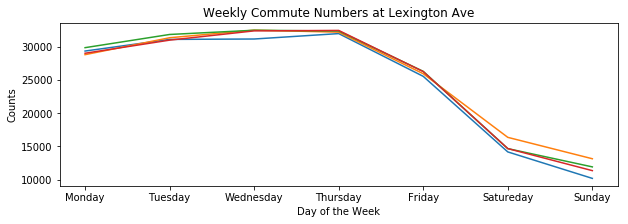

In [40]:
plt.figure(figsize=(10, 3))
plt.plot(week_count_list1)
plt.plot(week_count_list2)
plt.plot(week_count_list3)
plt.plot(week_count_list4)
plt.xticks([0,1,2,3,4,5,6],('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Satureday', 'Sunday'))
plt.title("Weekly Commute Numbers at Lexington Ave")
plt.xlabel("Day of the Week")
plt.ylabel("Counts");

## Challenge 9

* Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [41]:
with open('turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [42]:
with open('turnstile_150620.txt') as f:
    reader = csv.reader(f)
    rows2 = [[cell.strip() for cell in row] for row in reader]

In [43]:
with open('turnstile_150613.txt') as f:
    reader = csv.reader(f)
    rows3 = [[cell.strip() for cell in row] for row in reader]

In [44]:
with open('turnstile_150606.txt') as f:
    reader = csv.reader(f)
    rows4 = [[cell.strip() for cell in row] for row in reader]

In [45]:
for row in [rows, rows2, rows3, rows4]:
    assert row.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [46]:
import itertools
rows_total = [rows + rows2 + rows3 + rows4]
rows_total = list(itertools.chain.from_iterable(rows_total))

In [47]:
raw_readings_station = {}
for row in rows_total:
    raw_readings_station.setdefault(row[3], []) \
    .append(tuple(x for i,x in enumerate(row) if i!=3))
list(raw_readings_station.items())[0]

('LEXINGTON AVE',
 [('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '00:00:00',
   'REGULAR',
   '0005192500',
   '0001756572'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '04:00:00',
   'REGULAR',
   '0005192550',
   '0001756580'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '08:00:00',
   'REGULAR',
   '0005192568',
   '0001756609'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '12:00:00',
   'REGULAR',
   '0005192670',
   '0001756706'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '16:00:00',
   'REGULAR',
   '0005192886',
   '0001756776'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/20/2015',
   '20:00:00',
   'REGULAR',
   '0005193250',
   '0001756837'),
  ('A002',
   'R051',
   '02-00-00',
   'NQR456',
   'BMT',
   '06/21/2015',
   '00:00:00',
   'REGULAR',
   '0005193409',
   '000175687

In [48]:
datetime_cumulative_station = {turnstile: [(datetime.strptime(date + time,
                                    '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, _, _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings_station.items()}
list(datetime_cumulative_station.items())[0]

('LEXINGTON AVE',
 [(datetime.datetime(2015, 6, 20, 0, 0), 5192500),
  (datetime.datetime(2015, 6, 20, 4, 0), 5192550),
  (datetime.datetime(2015, 6, 20, 8, 0), 5192568),
  (datetime.datetime(2015, 6, 20, 12, 0), 5192670),
  (datetime.datetime(2015, 6, 20, 16, 0), 5192886),
  (datetime.datetime(2015, 6, 20, 20, 0), 5193250),
  (datetime.datetime(2015, 6, 21, 0, 0), 5193409),
  (datetime.datetime(2015, 6, 21, 4, 0), 5193435),
  (datetime.datetime(2015, 6, 21, 8, 0), 5193461),
  (datetime.datetime(2015, 6, 21, 12, 0), 5193533),
  (datetime.datetime(2015, 6, 21, 16, 0), 5193752),
  (datetime.datetime(2015, 6, 21, 20, 0), 5193985),
  (datetime.datetime(2015, 6, 22, 0, 0), 5194109),
  (datetime.datetime(2015, 6, 22, 4, 0), 5194120),
  (datetime.datetime(2015, 6, 22, 8, 0), 5194164),
  (datetime.datetime(2015, 6, 22, 12, 0), 5194383),
  (datetime.datetime(2015, 6, 22, 16, 0), 5194686),
  (datetime.datetime(2015, 6, 22, 20, 0), 5195595),
  (datetime.datetime(2015, 6, 23, 0, 0), 5195847),
  (d

In [49]:
datetime_count_times_station = {turnstile: [[rows[i][0], # datetime
                                             # delta on entries
                                             rows[i+1][1] - rows[i][1],
                                             # delta on datetime
                                             rows[i+1][0] - rows[i][0]]
                                            for i in range(len(rows) - 1)]
                                for turnstile, rows in datetime_cumulative_station.items()}
list(datetime_count_times_station.items())[0]

('LEXINGTON AVE',
 [[datetime.datetime(2015, 6, 20, 0, 0), 50, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 4, 0), 18, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 8, 0), 102, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 12, 0), 216, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 16, 0), 364, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 20, 20, 0), 159, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 0, 0), 26, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 4, 0), 26, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 8, 0), 72, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 12, 0), 219, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 16, 0), 233, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 21, 20, 0), 124, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 6, 22, 0, 0), 11, datetime.tim

In [50]:
month_counts_station = {turnstile: sum(count
                                       for (time, count, _) in rows
                                       if 0 <= count <= 5000)
                           for turnstile, rows in datetime_count_times_station.items()}
list(month_counts_station.items())

[('LEXINGTON AVE', 710118),
 ('5 AVE-59 ST', 506428),
 ('57 ST-7 AVE', 559370),
 ('49 ST-7 AVE', 601665),
 ('42 ST-TIMES SQ', 2558214),
 ('34 ST-HERALD SQ', 2981461),
 ('28 ST-BROADWAY', 323101),
 ('23 ST-5 AVE', 628130),
 ('14 ST-UNION SQ', 2782367),
 ("8 ST-B'WAY NYU", 434399),
 ("PRINCE ST-B'WAY", 419553),
 ('CANAL ST', 1846813),
 ('CITY HALL', 148038),
 ('CORTLANDT ST', 258208),
 ('RECTOR ST', 411868),
 ('WHITEHALL ST', 383221),
 ('ESSEX ST', 235840),
 ('BOWERY', 88033),
 ('CHAMBERS ST', 1682443),
 ('FULTON ST', 1921377),
 ('BROAD ST', 161389),
 ('7 AVE', 240072),
 ('PARK PLACE', 136353),
 ('BOTANIC GARDEN', 41410),
 ('PROSPECT PARK', 265891),
 ('PARKSIDE AVE', 137211),
 ('CHURCH AVE', 961588),
 ('BEVERLEY ROAD', 70730),
 ('CORTELYOU ROAD', 153326),
 ('NEWKIRK PLAZA', 274074),
 ('AVE H', 66106),
 ('AVE J', 153099),
 ('AVE M', 136960),
 ('KINGS HIGHWAY', 705427),
 ('AVE U', 337231),
 ('NECK ROAD', 104580),
 ('SHEEPSHEAD BAY', 342471),
 ('BRIGHTON BEACH', 319823),
 ('OCEAN PARKWAY', 

`month_count_station` is a solutionto **Challenge 9**.

## Challenge 10

* Make a single list of these total ridership values and plot it with

```
plt.hist(total_ridership_counts)
```

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

Additional Hint:

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do

```indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)```


In [51]:
total_ridership_counts = []
for k, v in list(month_counts_station.items()):
    total_ridership_counts.append(v)
total_ridership_counts

[710118,
 506428,
 559370,
 601665,
 2558214,
 2981461,
 323101,
 628130,
 2782367,
 434399,
 419553,
 1846813,
 148038,
 258208,
 411868,
 383221,
 235840,
 88033,
 1682443,
 1921377,
 161389,
 240072,
 136353,
 41410,
 265891,
 137211,
 961588,
 70730,
 153326,
 274074,
 66106,
 153099,
 136960,
 705427,
 337231,
 104580,
 342471,
 319823,
 82867,
 899124,
 957011,
 727839,
 1070747,
 162725,
 235168,
 333837,
 96620,
 440076,
 182420,
 182854,
 1592998,
 205100,
 1045872,
 2822514,
 150455,
 1003752,
 428430,
 145294,
 399716,
 228561,
 188939,
 142514,
 1273450,
 47635,
 89952,
 594086,
 186414,
 117434,
 70097,
 515963,
 75003,
 149261,
 183430,
 621189,
 741611,
 285463,
 260336,
 819302,
 184521,
 196247,
 207993,
 800219,
 361717,
 116092,
 49545,
 44590,
 306868,
 81860,
 310700,
 95924,
 327097,
 63381,
 189954,
 330592,
 75506,
 301379,
 126485,
 165450,
 81207,
 64878,
 159172,
 89790,
 91542,
 128412,
 36528,
 92013,
 99564,
 698117,
 57584,
 350157,
 62248,
 83816,
 97501

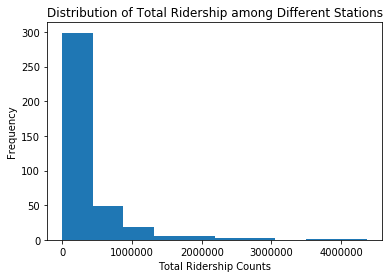

In [52]:
plt.hist(total_ridership_counts)
plt.title("Distribution of Total Ridership among Different Stations")
plt.xlabel("Total Ridership Counts")
plt.ylabel("Frequency");